# Aproksymacja liniowa

***Zadanie 1.***

Zdefiniuj funkcję liniową z dowolnymi paramterami $a,b$. Przeprowadź symulację zaszumionego próbkowania jej wartości z przedziału [0,50]. Wykreśl funkcję wraz z jej zaszumionymi próbkami, a następnie dokonaj aproskymacji swojej funkcji za pomocą:
* funkcji liniowej,
* funkcji kwadratowej,
* wielomianu trzeciego stopnia.

Zastosuj metodę/metody minimalizujące najmniejszych kwadratów (normę średniokwadratową np. funkcję *curve_fit* z [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)).

Porównaj otrzymane wyniki z metodami interpolacji poznanymi na poprzednich zajęciach. W tym celu przeprowadź interpolację wygenerowanych danych za pomocą wielomianu interpolacyjnego Lagrange'a oraz za pomocą funkcji sklejanych.

*Wskazówka*: Najpierw wygerneruj tablicę 100 wartości $(x_i, f(x_i))$ dla $x_i \in [0,50]$. Następnie za pomocą np. funkcji *np.random.normal* wygeneruj 100-elementową tablicę szumu losowego i dodaj ją do wygenerowanych **wartości** funkcji (tj. do $f(x_i)$).

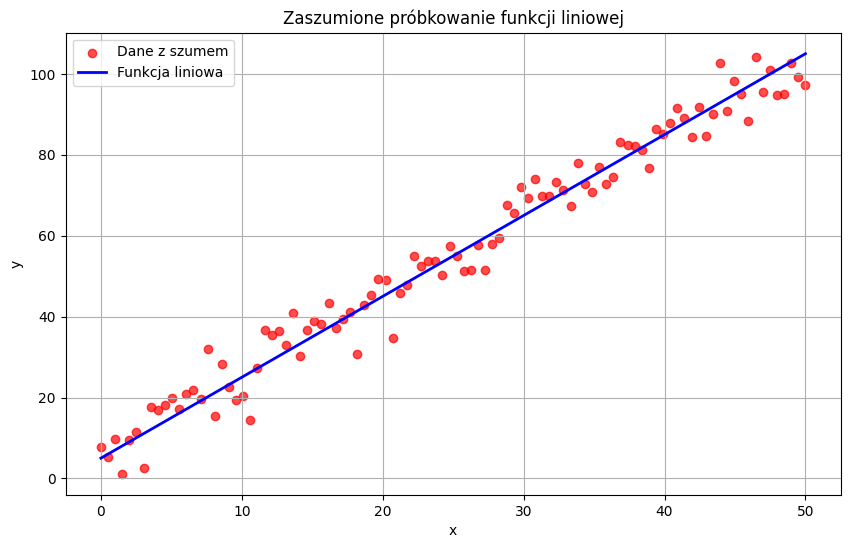

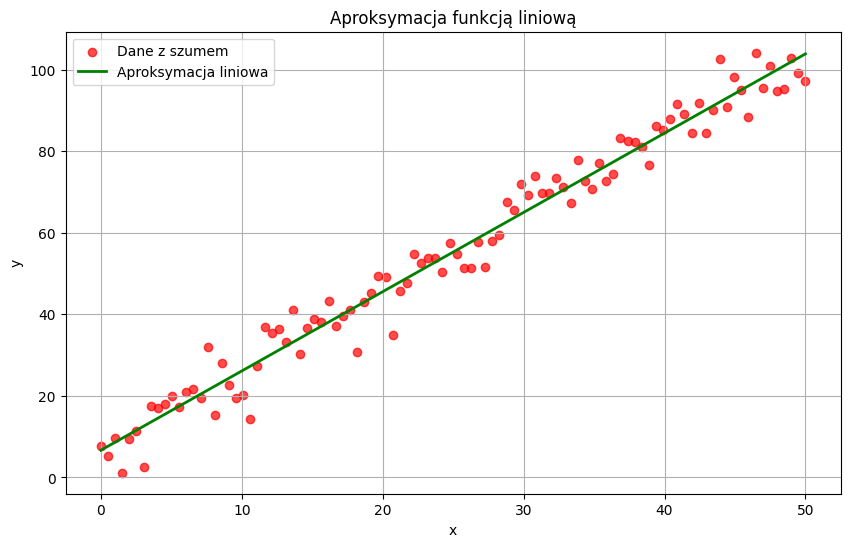

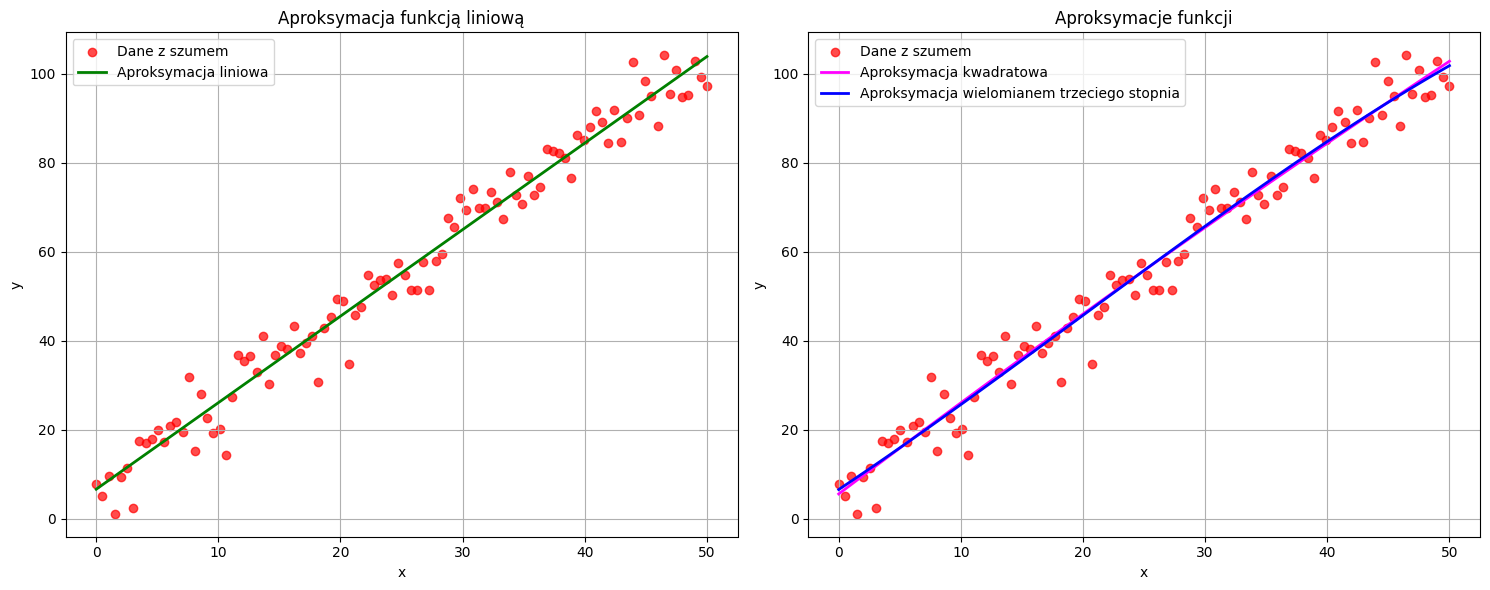

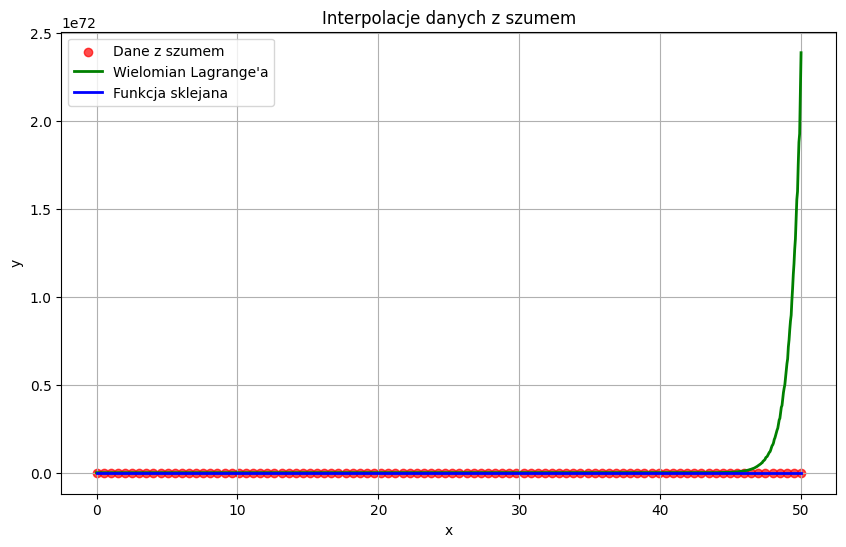

Błąd aproksymacji liniowej: 8.615402140607317
Błąd aproksymacji kwadratowej: 9.901687321045982
Błąd aproksymacji wielomianem trzeciego stopnia: 10.672240179153137
Błąd interpolacji wielomianem Lagrange'a: 2.759174452034842e+72
Błąd interpolacji funkcją sklejaną: 47.77627808346056


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import lagrange, CubicSpline

# Zdefiniuj funkcję liniową
def linear_function(x, a, b):
    return a * x + b

# Generowanie danych
x = np.linspace(0, 50, 100)
y_true = linear_function(x, 2, 5)  # przykładowe parametry a=2, b=5

# Generowanie szumu
noise = np.random.normal(0, 5, 100)  # szum o średniej 0 i odchyleniu standardowym 5
y_noisy = y_true + noise

# Wykres danych z szumem
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label='Dane z szumem', color='red', alpha=0.7)
plt.plot(x, y_true, label='Funkcja liniowa', color='blue', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Zaszumione próbkowanie funkcji liniowej')
plt.legend()
plt.grid(True)
plt.show()



# Aproksymacja funkcją liniową
params_linear, _ = curve_fit(linear_function, x, y_noisy)
y_linear_fit = linear_function(x, *params_linear)

# Wykres aproksymacji funkcją liniową
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label='Dane z szumem', color='red', alpha=0.7)
plt.plot(x, y_linear_fit, label='Aproksymacja liniowa', color='green', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproksymacja funkcją liniową')
plt.legend()
plt.grid(True)
plt.show()



# Funkcja kwadratowa
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

params_quad, _ = curve_fit(quadratic_function, x, y_noisy)
y_quad_fit = quadratic_function(x, *params_quad)

# Wielomian trzeciego stopnia
def cubic_function(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

params_cubic, _ = curve_fit(cubic_function, x, y_noisy)
y_cubic_fit = cubic_function(x, *params_cubic)

# Wykresy aproksymacji
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y_noisy, label='Dane z szumem', color='red', alpha=0.7)
plt.plot(x, y_linear_fit, label='Aproksymacja liniowa', color='green', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproksymacja funkcją liniową')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x, y_noisy, label='Dane z szumem', color='red', alpha=0.7)
plt.plot(x, y_quad_fit, label='Aproksymacja kwadratowa', color='magenta', linewidth=2)
plt.plot(x, y_cubic_fit, label='Aproksymacja wielomianem trzeciego stopnia', color='blue', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproksymacje funkcji')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Interpolacja wielomianem Lagrange'a
lagrange_poly = lagrange(x, y_noisy)
x_interp = np.linspace(0, 50, 1000)
y_lagrange_interp = lagrange_poly(x_interp)

# Interpolacja funkcją sklejaną
cs = CubicSpline(x, y_noisy)
y_cs_interp = cs(x_interp)

# Wykres interpolacji
# Wykres interpolacji
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label='Dane z szumem', color='red', alpha=0.7)
plt.plot(x_interp, y_lagrange_interp, label='Wielomian Lagrange\'a', color='green', linewidth=2)
plt.plot(x_interp, y_cs_interp, label='Funkcja sklejana', color='blue', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacje danych z szumem')
plt.legend()
plt.grid(True)
plt.show()




# Obliczenie wartości funkcji aproksymujących w punktach x
y_linear_fit_points = linear_function(x, *params_linear)
y_quad_fit_points = quadratic_function(x, *params_quad)
y_cubic_fit_points = cubic_function(x, *params_cubic)
y_lagrange_points = lagrange_poly(x)
y_cs_points = cs(x)

# Błędy aproksymacji
error_linear = np.linalg.norm(y_true - y_linear_fit_points)
error_quad = np.linalg.norm(y_true - y_quad_fit_points)
error_cubic = np.linalg.norm(y_true - y_cubic_fit_points)
error_lagrange = np.linalg.norm(y_true - y_lagrange_points)
error_cs = np.linalg.norm(y_true - y_cs_points)

print(f'Błąd aproksymacji liniowej: {error_linear}')
print(f'Błąd aproksymacji kwadratowej: {error_quad}')
print(f'Błąd aproksymacji wielomianem trzeciego stopnia: {error_cubic}')
print(f'Błąd interpolacji wielomianem Lagrange\'a: {error_lagrange}')
print(f'Błąd interpolacji funkcją sklejaną: {error_cs}')

***Zadanie 2.***


Wykorzystaj metody aproksymacji do rozwiązania zadania z kierowcą z poprzednich ćwiczeń.


Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

***Zadanie 3.***


Spróbuj przeprowadzić regresję liniową (aproksymację funkcją liniową) na rzeczywistych danych (np. z repozytorium [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)). Wykorzystaj stworzony model do predykcji. Dla ułatwienia możesz zastosować funkcję z biblioteki [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [1]:
#Zadnie 2.3 
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Wczytanie danych
diabetes = load_diabetes()
X = diabetes.data  # cechy
y = diabetes.target  # etykiety

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utworzenie modelu i jego trenowanie
model = LinearRegression()
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocenienie jakości modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
print(f"Współczynnik determinacji (R^2): {r2}") 

Średni błąd kwadratowy (MSE): 2900.19362849348
Współczynnik determinacji (R^2): 0.4526027629719197
